In [2]:
from graphviz import Source

## Model schematic

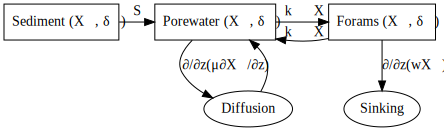

In [6]:
src = Source(
    """digraph G {
    P [shape=box, label=<Porewater (X&#x209a;, &delta;&#x209a;)>];
    F [shape=box, label=<Forams (X&#x2099;, &delta;&#x2099;)>];
    S [shape=box, label=<Sediment (X&#x209b;, &delta;&#x209b;)>];
    D [label="Diffusion"]; W [label="Sinking"];
    {rank=same; P; F; S}; {rank=same; D; W};
    S->P [label="S"]; D->P;
    P->F [label=<k&#x209a;&#x2099;X&#x2099;>];
    F->P [label=<k&#x2099;&#x209a;X&#x2099;>];
    P->D [label=<&#x2202;/&#x2202;z(&mu;&#x2202;X&#x209a;/&#x2202;z)>];
    F->W [label=<&#x2202;/&#x2202;z(wX&#x2099;)>];
    }"""
)
src

$$\require{cancel}$$
## Model equations
Set the time rate of change equal to the sum of fluxes

$$\frac{\partial X_p}{\partial t} = S + k_{np}X_n - k_{pn}X_n + \frac{\partial}{\partial z}\bigg(\mu\frac{\partial X_p}{\partial z}\bigg) \tag{Eq. 1a}$$

$$\frac{\partial X_n}{\partial t} = k_{pn}X_n - k_{np}X_n + \frac{\partial}{\partial z}\bigg(wX_n\bigg) \tag{Eq. 1b}$$

$$\frac{\partial \delta_p}{\partial t} = \bigg[\bigg(\delta_s - \delta_p\bigg)S + \bigg(\delta_n - \delta_p\bigg)k_{np}X_n + \mu\frac{\partial X_p}{\partial z}\frac{\partial \delta_p}{\partial z}\bigg]\frac{1}{X_p} \tag{Eq. 1c}$$

$$\frac{\partial \delta_n}{\partial t} = \bigg(\delta_p - \delta_n\bigg)k_{pn} + w\frac{\partial\delta_n}{\partial z} \tag{Eq. 1d}$$

## Porewater fraction equation (Eq. 1c)
Multiply all concentrations and fluxes in Eq. 1a by their corresponding isotopic fraction

$$\frac{\partial}{\partial t}\bigg(\delta_pX_p\bigg) = \delta_sS + \delta_nk_{np}X_n - \delta_pk_{pn}X_n + \frac{\partial}{\partial z}\bigg(\delta_p\mu\frac{\partial X_p}{\partial z}\bigg) \tag{Eq. 2}$$

Solve the LHS of Eq. 2 for $\partial \delta_p/\partial t$ using the Product Rule

$$\frac{\partial \delta_p}{\partial t} = \bigg[\frac{\partial}{\partial t}\bigg(\delta_pX_p\bigg) - \delta_p\frac{\partial X_p}{\partial t}\bigg]\frac{1}{X_p} \tag{Eq. 3}$$

Substitute the RHS of Eqs. 1a and 2 into $\partial X_p/\partial t$ and $\partial \delta_pX_p/\partial t$ in Eq. 3

$$\frac{\partial \delta_p}{\partial t} = \bigg[\underbrace{\delta_sS + \delta_nk_{np}X_n - \cancel{\delta_pk_{pn}X_n} + \frac{\partial}{\partial z}\bigg(\delta_p\mu\frac{\partial X_p}{\partial z}\bigg)}_{\text{Eq. 2}} - \delta_p\bigg(\underbrace{S + k_{np}X_n - \cancel{k_{pn}X_n} + \frac{\partial}{\partial z}\bigg(\mu\frac{\partial X_p}{\partial z}\bigg)}_{\text{Eq. 1a}}\bigg)\bigg]\frac{1}{X_p} \tag{Eq. 4}$$

Expand the diffusion term from Eq. 2 using the Product Rule

$$\frac{\partial \delta_p}{\partial t} = \bigg[\bigg(\delta_s - \delta_p\bigg)S + \bigg(\delta_n - \delta_p\bigg)k_{np}X_n + \underbrace{\mu\frac{\partial X_p}{\partial z}\frac{\partial \delta_p}{\partial z} + \cancel{\delta_p\frac{\partial}{\partial z}\bigg(\mu\frac{\partial X_p}{\partial z}\bigg)}}_{\text{expanded diffusion from Eq. 2}} - \cancel{\delta_p\frac{\partial}{\partial z}\bigg(\mu\frac{\partial X_p}{\partial z}\bigg)}\bigg]\frac{1}{X_p} \tag{Eq. 5}$$

So the expression for porewater fraction becomes Eq. 1c

## Foram fraction equation (Eq. 1d)
Multiply all concentrations and fluxes in Eq. 1b by their corresponding isotopic fraction

$$\frac{\partial}{\partial t}\bigg(\delta_nX_n\bigg) = \delta_pk_{pn}X_n - \delta_nk_{np}X_n + \frac{\partial}{\partial z}\bigg(\delta_nwX_n\bigg) \tag{Eq. 6}$$

Solve the LHS of Eq. 6 for $\partial \delta_n/\partial t$ using the Product Rule

$$\frac{\partial \delta_n}{\partial t} = \bigg[\frac{\partial}{\partial t}\bigg(\delta_nX_n\bigg) - \delta_n\frac{\partial X_n}{\partial t}\bigg]\frac{1}{X_n} \tag{Eq. 7}$$

Substitute the RHS of Eqs. 1b and 6 into $\partial X_n/\partial t$ and $\partial \delta_nX_n/\partial t$ in Eq. 7

$$\frac{\partial \delta_n}{\partial t} = \bigg[\underbrace{\delta_pk_{pn}X_n - \cancel{\delta_nk_{np}X_n} + \frac{\partial}{\partial z}\bigg(\delta_nwX_n\bigg)}_{\text{Eq. 6}} - \delta_n\bigg(\underbrace{k_{pn}X_n - \cancel{k_{np}X_n} + \frac{\partial}{\partial z}\bigg(wX_n\bigg)}_{\text{Eq. 1b}}\bigg)\bigg]\frac{1}{X_n} \tag{Eq. 8}$$

Expand the sinking term in Eq. 6 using the Product Rule

$$\frac{\partial \delta_n}{\partial t} = \bigg[\bigg(\delta_p - \delta_n\bigg)k_{pn}X_n + \underbrace{\cancel{\delta_n\frac{\partial}{\partial z}\bigg(wX_n\bigg)} + wX_n\frac{\partial\delta_n}{\partial z}}_{\text{expanded sinking from Eq. 6}} - \cancel{\delta_n\frac{\partial}{\partial z}\bigg(wX_n\bigg)}\bigg]\frac{1}{X_n} \tag{Eq. 9}$$

So the expression for foram fraction becomes Eq. 1d